***
*Project:* Helmholtz Machine on Niche Construction

*Author:* Jingwei Liu, Computer Music Ph.D., UC San Diego
***

# <span style="background-color:darkorange; color:white; padding:2px 6px">Experiment 4_4</span> 

# Active Sampling on Excluding False Instances


*Created:* December 26, 2023

*Updated:* December 26, 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

In [2]:
structure = [[12,10,8,7,5,4,3,1]]
n_dz = np.array(structure)
n_dz

array([[12, 10,  8,  7,  5,  4,  3,  1]])

In [3]:
value_set = [1,0]
activation_type = "tanh"
bias = [False,False,True] # [instantiation bias, MLP bias,data bias]

In [8]:
Phi, Theta = ut.parameter_initialization("zero",n_dz)  # "zero" or "random"

In [9]:
dataset = np.load('self_org_dataset.npy')
dataset.shape

(12, 627)

We take this dataset as well-formed bound, which presents all valid instances.

In [6]:
n = n_dz[0,0]
n_data = dataset.shape[1]
n_layer = n_dz.shape[1]

In [7]:
entire_set = ut.all_comb(n, value_set)
reordered_set = ut.reorder_all_comb(entire_set,dataset)

Train the model:

In [23]:
lr = 0.008
epoch = 1000
n_data = dataset.shape[1]
n_layer = n_dz.shape[1]

In [29]:
### Training without constraints, accuracy 0.82

for e in range (epoch):
    index = np.random.permutation(n_data)
    Loss_Q_total = np.zeros(n_layer)
    Loss_P_total = np.zeros(n_layer)
    for i in range(n_data):
        d0 = dataset[:,index[i]:index[i]+1]
        Alpha_Q = ut.wake_sample(n_dz,d0,value_set,Phi,activation_type,bias)
        Theta,Loss_P = ut.sleep_update_delta(Theta,Alpha_Q,lr,n_dz,value_set,activation_type,bias)
        Alpha_P = ut.sleep_sample(n_dz,value_set,Theta,activation_type,bias)
        Phi,Loss_Q = ut.wake_update_delta(Phi,Alpha_P,lr,n_dz,value_set,activation_type,bias)
        
        Loss_Q_total += Loss_Q
        Loss_P_total += Loss_P
    Loss_Q_total = Loss_Q_total/n_data
    Loss_P_total = Loss_P_total/n_data
    print('Loss_Q: '+ str(np.around(Loss_Q_total,2)), 'Loss_P: '+ str(np.around(Loss_P_total,2)))

Loss_Q: [1.77 1.19 2.25 1.39 1.16 1.   0.   8.76] Loss_P: [ 3.16  2.52  1.75  2.33  1.53  1.2   1.1  13.6 ]
Loss_Q: [1.79 1.18 2.33 1.38 1.17 1.   0.   8.85] Loss_P: [ 3.17  2.53  1.7   2.31  1.48  1.21  1.09 13.48]
Loss_Q: [1.76 1.15 2.25 1.3  1.13 0.99 0.   8.58] Loss_P: [ 3.15  2.51  1.69  2.29  1.4   1.19  1.12 13.34]
Loss_Q: [1.8  1.1  2.23 1.32 1.12 1.01 0.   8.58] Loss_P: [ 3.15  2.49  1.68  2.25  1.37  1.16  1.11 13.21]
Loss_Q: [1.84 1.14 2.25 1.31 1.13 1.01 0.   8.67] Loss_P: [ 3.15  2.52  1.7   2.3   1.39  1.19  1.13 13.39]
Loss_Q: [1.81 1.16 2.21 1.34 1.12 1.04 0.   8.68] Loss_P: [ 3.16  2.56  1.68  2.26  1.36  1.17  1.14 13.32]
Loss_Q: [1.79 1.09 2.22 1.3  1.09 1.04 0.   8.53] Loss_P: [ 3.15  2.53  1.6   2.24  1.42  1.22  1.14 13.29]
Loss_Q: [1.85 1.14 2.2  1.34 1.09 1.02 0.   8.65] Loss_P: [ 3.16  2.54  1.67  2.25  1.45  1.18  1.11 13.37]
Loss_Q: [1.85 1.09 2.22 1.35 1.11 1.02 0.   8.63] Loss_P: [ 3.13  2.56  1.69  2.24  1.4   1.16  1.11 13.28]
Loss_Q: [1.86 1.14 2.18 1.37

Loss_Q: [1.81 1.15 2.04 1.21 1.07 0.98 0.   8.25] Loss_P: [ 3.2   2.36  1.65  2.12  1.24  1.15  1.07 12.79]
Loss_Q: [1.69 1.08 1.99 1.17 1.05 0.97 0.   7.96] Loss_P: [ 3.19  2.38  1.59  2.07  1.27  1.15  1.07 12.73]
Loss_Q: [1.73 1.05 1.98 1.13 1.03 0.95 0.   7.88] Loss_P: [ 3.19  2.41  1.64  2.04  1.17  1.08  1.07 12.61]
Loss_Q: [1.82 1.06 1.97 1.16 1.02 0.96 0.   7.99] Loss_P: [ 3.19  2.42  1.61  2.03  1.19  1.1   1.09 12.63]
Loss_Q: [1.76 1.02 1.97 1.07 1.02 0.97 0.   7.81] Loss_P: [ 3.2   2.43  1.58  2.09  1.19  1.12  1.1  12.71]
Loss_Q: [1.76 1.09 1.97 1.11 1.09 0.98 0.   8.01] Loss_P: [ 3.18  2.44  1.61  2.06  1.12  1.13  1.08 12.64]
Loss_Q: [1.79 1.11 1.97 1.08 1.04 0.97 0.   7.96] Loss_P: [ 3.18  2.48  1.61  2.04  1.16  1.11  1.1  12.69]
Loss_Q: [1.72 1.06 1.92 1.11 1.03 0.96 0.   7.81] Loss_P: [ 3.23  2.35  1.57  1.97  1.19  1.11  1.09 12.51]
Loss_Q: [1.65 1.03 1.86 1.12 1.05 0.95 0.   7.66] Loss_P: [ 3.25  2.37  1.58  1.96  1.25  1.15  1.08 12.64]
Loss_Q: [1.78 1.16 1.92 1.21

Loss_Q: [1.66 1.04 1.88 1.34 1.14 0.89 0.   7.97] Loss_P: [ 3.19  2.34  1.67  1.96  1.35  1.24  0.99 12.75]
Loss_Q: [1.66 1.07 1.9  1.28 1.16 0.89 0.   7.94] Loss_P: [ 3.22  2.31  1.61  1.93  1.33  1.27  0.99 12.66]
Loss_Q: [1.65 1.1  1.92 1.3  1.18 0.89 0.   8.04] Loss_P: [ 3.15  2.35  1.64  1.96  1.34  1.25  0.96 12.64]
Loss_Q: [1.61 1.09 1.87 1.22 1.15 0.88 0.   7.83] Loss_P: [ 3.15  2.32  1.67  1.97  1.37  1.26  0.97 12.71]
Loss_Q: [1.63 1.16 1.96 1.31 1.14 0.87 0.   8.07] Loss_P: [ 3.23  2.28  1.7   1.97  1.43  1.24  0.98 12.82]
Loss_Q: [1.55 1.14 1.93 1.36 1.18 0.88 0.   8.05] Loss_P: [ 3.18  2.32  1.64  1.93  1.43  1.29  0.98 12.77]
Loss_Q: [1.7  1.15 1.99 1.38 1.17 0.87 0.   8.25] Loss_P: [ 3.2   2.29  1.68  1.97  1.43  1.23  0.98 12.78]
Loss_Q: [1.63 1.11 1.97 1.38 1.16 0.89 0.   8.14] Loss_P: [ 3.18  2.32  1.64  1.99  1.43  1.25  0.96 12.79]
Loss_Q: [1.57 1.18 1.97 1.37 1.16 0.83 0.   8.08] Loss_P: [ 3.17  2.28  1.66  1.98  1.43  1.23  0.93 12.68]
Loss_Q: [1.66 1.16 1.91 1.34

Loss_Q: [1.79 1.11 1.85 1.07 1.16 0.9  0.   7.87] Loss_P: [ 3.18  2.54  1.68  1.86  1.13  1.24  1.   12.62]
Loss_Q: [1.88 1.18 1.89 1.06 1.16 0.89 0.   8.05] Loss_P: [ 3.17  2.49  1.72  1.92  1.14  1.25  0.98 12.66]
Loss_Q: [1.79 1.15 1.86 1.06 1.17 0.87 0.   7.91] Loss_P: [ 3.13  2.57  1.67  1.91  1.1   1.26  0.99 12.62]
Loss_Q: [1.84 1.15 1.89 0.98 1.17 0.85 0.   7.89] Loss_P: [ 3.14  2.56  1.68  1.9   1.03  1.24  0.98 12.53]
Loss_Q: [1.81 1.07 1.9  1.04 1.21 0.87 0.   7.9 ] Loss_P: [ 3.18  2.56  1.72  1.96  1.11  1.3   0.96 12.78]
Loss_Q: [1.84 1.15 1.91 1.04 1.22 0.86 0.   8.02] Loss_P: [ 3.13  2.55  1.7   1.95  1.13  1.33  0.96 12.74]
Loss_Q: [1.82 1.19 1.91 1.12 1.23 0.89 0.   8.16] Loss_P: [ 3.18  2.53  1.73  1.9   1.14  1.35  0.97 12.79]
Loss_Q: [1.78 1.17 1.91 1.03 1.22 0.86 0.   7.99] Loss_P: [ 3.2   2.46  1.74  1.92  1.11  1.32  0.97 12.74]
Loss_Q: [1.72 1.18 1.88 1.02 1.27 0.88 0.   7.94] Loss_P: [ 3.18  2.41  1.69  1.93  1.13  1.33  0.96 12.64]
Loss_Q: [1.67 1.16 1.87 1.07

Loss_Q: [1.59 1.19 2.08 1.22 1.28 0.82 0.   8.18] Loss_P: [ 3.19  2.22  1.63  2.09  1.27  1.44  0.93 12.76]
Loss_Q: [1.55 1.14 2.07 1.19 1.33 0.81 0.   8.08] Loss_P: [ 3.22  2.22  1.67  2.12  1.28  1.44  0.9  12.85]
Loss_Q: [1.59 1.15 2.07 1.18 1.33 0.81 0.   8.13] Loss_P: [ 3.25  2.19  1.66  2.1   1.22  1.42  0.88 12.73]
Loss_Q: [1.53 1.15 2.02 1.19 1.33 0.81 0.   8.04] Loss_P: [ 3.21  2.15  1.62  2.07  1.31  1.4   0.93 12.68]
Loss_Q: [1.56 1.18 2.06 1.17 1.35 0.82 0.   8.13] Loss_P: [ 3.2   2.19  1.62  2.08  1.25  1.48  0.9  12.71]
Loss_Q: [1.57 1.23 2.1  1.19 1.32 0.79 0.   8.21] Loss_P: [ 3.2   2.18  1.71  2.05  1.25  1.42  0.88 12.7 ]
Loss_Q: [1.44 1.15 2.04 1.15 1.3  0.79 0.   7.87] Loss_P: [ 3.22  2.17  1.73  2.05  1.28  1.45  0.91 12.81]
Loss_Q: [1.49 1.13 2.04 1.09 1.29 0.77 0.   7.81] Loss_P: [ 3.18  2.09  1.63  2.05  1.21  1.42  0.84 12.41]
Loss_Q: [1.49 1.16 2.03 1.2  1.3  0.78 0.   7.95] Loss_P: [ 3.18  2.14  1.66  2.03  1.23  1.38  0.84 12.45]
Loss_Q: [1.52 1.19 1.99 1.18

Loss_Q: [1.74 1.12 2.08 1.18 1.27 0.84 0.   8.24] Loss_P: [ 3.14  2.44  1.7   2.1   1.31  1.35  0.93 12.97]
Loss_Q: [1.7  1.13 2.11 1.19 1.31 0.82 0.   8.26] Loss_P: [ 3.14  2.42  1.62  2.09  1.29  1.4   0.93 12.88]
Loss_Q: [1.74 1.15 2.13 1.16 1.33 0.86 0.   8.37] Loss_P: [ 3.18  2.46  1.66  2.1   1.28  1.41  0.91 13.  ]
Loss_Q: [1.8  1.16 2.14 1.18 1.35 0.86 0.   8.5 ] Loss_P: [ 3.2   2.42  1.61  2.17  1.35  1.44  0.97 13.16]
Loss_Q: [1.73 1.09 2.18 1.19 1.36 0.85 0.   8.4 ] Loss_P: [ 3.15  2.41  1.66  2.18  1.31  1.45  0.95 13.11]
Loss_Q: [1.71 1.09 2.2  1.22 1.35 0.88 0.   8.45] Loss_P: [ 3.2   2.4   1.64  2.18  1.31  1.45  0.96 13.14]
Loss_Q: [1.7  1.1  2.15 1.21 1.35 0.88 0.   8.39] Loss_P: [ 3.16  2.37  1.63  2.18  1.37  1.44  0.99 13.14]
Loss_Q: [1.76 1.17 2.13 1.2  1.32 0.87 0.   8.44] Loss_P: [ 3.14  2.47  1.64  2.11  1.34  1.44  0.97 13.11]
Loss_Q: [1.81 1.15 2.11 1.28 1.34 0.9  0.   8.59] Loss_P: [ 3.14  2.47  1.68  2.1   1.37  1.45  1.   13.21]
Loss_Q: [1.72 1.13 2.13 1.24

Loss_Q: [1.64 1.26 2.08 1.52 1.28 0.89 0.   8.67] Loss_P: [ 3.21  2.17  1.69  2.09  1.62  1.35  1.03 13.16]
Loss_Q: [1.57 1.17 2.04 1.44 1.28 0.93 0.   8.41] Loss_P: [ 3.21  2.21  1.67  2.03  1.54  1.4   1.04 13.1 ]
Loss_Q: [1.6  1.27 2.02 1.5  1.31 0.92 0.   8.62] Loss_P: [ 3.19  2.23  1.69  2.03  1.57  1.36  1.04 13.11]
Loss_Q: [1.62 1.17 2.03 1.41 1.3  0.93 0.   8.46] Loss_P: [ 3.2   2.24  1.72  2.03  1.54  1.34  1.04 13.12]
Loss_Q: [1.62 1.18 2.02 1.4  1.25 0.91 0.   8.38] Loss_P: [ 3.19  2.2   1.68  2.06  1.62  1.42  1.06 13.23]
Loss_Q: [1.58 1.17 2.03 1.41 1.25 0.9  0.   8.35] Loss_P: [ 3.15  2.27  1.69  2.09  1.54  1.41  1.05 13.21]
Loss_Q: [1.64 1.25 2.07 1.45 1.25 0.93 0.   8.59] Loss_P: [ 3.18  2.26  1.64  2.12  1.56  1.4   1.08 13.24]
Loss_Q: [1.57 1.16 2.06 1.41 1.32 0.92 0.   8.44] Loss_P: [ 3.15  2.27  1.65  2.12  1.52  1.41  1.08 13.2 ]
Loss_Q: [1.65 1.18 2.1  1.42 1.3  0.99 0.   8.62] Loss_P: [ 3.18  2.25  1.62  2.1   1.53  1.43  1.11 13.21]
Loss_Q: [1.6  1.18 2.01 1.42

Loss_Q: [1.78 1.2  1.94 1.46 1.15 0.77 0.   8.3 ] Loss_P: [ 3.17  2.46  1.75  2.02  1.51  1.24  0.93 13.09]
Loss_Q: [1.71 1.25 1.96 1.46 1.2  0.78 0.   8.35] Loss_P: [ 3.19  2.43  1.74  2.01  1.52  1.26  0.9  13.05]
Loss_Q: [1.78 1.21 1.96 1.46 1.14 0.77 0.   8.32] Loss_P: [ 3.2   2.37  1.75  2.02  1.51  1.25  0.89 12.98]
Loss_Q: [1.78 1.22 1.99 1.5  1.16 0.81 0.   8.46] Loss_P: [ 3.14  2.42  1.77  2.02  1.57  1.26  0.95 13.12]
Loss_Q: [1.75 1.2  2.   1.51 1.16 0.8  0.   8.4 ] Loss_P: [ 3.14  2.45  1.74  2.04  1.56  1.22  0.9  13.05]
Loss_Q: [1.71 1.16 1.95 1.51 1.15 0.81 0.   8.29] Loss_P: [ 3.12  2.44  1.72  2.02  1.58  1.24  0.93 13.05]
Loss_Q: [1.73 1.13 1.91 1.49 1.18 0.75 0.   8.19] Loss_P: [ 3.2   2.4   1.61  1.95  1.52  1.22  0.91 12.81]
Loss_Q: [1.76 1.13 1.91 1.49 1.1  0.78 0.   8.17] Loss_P: [ 3.17  2.37  1.7   1.98  1.55  1.2   0.9  12.86]
Loss_Q: [1.71 1.12 1.94 1.47 1.16 0.79 0.   8.2 ] Loss_P: [ 3.14  2.47  1.64  2.    1.53  1.2   0.93 12.91]
Loss_Q: [1.75 1.09 1.94 1.48

Loss_Q: [1.64 1.19 2.06 1.58 1.19 0.96 0.   8.62] Loss_P: [ 3.23  2.34  1.66  2.08  1.64  1.35  1.05 13.34]
Loss_Q: [1.58 1.21 1.99 1.6  1.23 0.9  0.   8.52] Loss_P: [ 3.22  2.27  1.71  2.14  1.69  1.34  1.05 13.43]
Loss_Q: [1.65 1.24 2.01 1.58 1.27 0.91 0.   8.66] Loss_P: [ 3.23  2.28  1.68  2.1   1.62  1.36  1.01 13.28]
Loss_Q: [1.7  1.27 2.01 1.62 1.24 0.87 0.   8.71] Loss_P: [ 3.23  2.3   1.69  2.05  1.68  1.37  1.01 13.33]
Loss_Q: [1.66 1.25 1.95 1.54 1.19 0.83 0.   8.42] Loss_P: [ 3.21  2.38  1.7   2.11  1.63  1.32  0.98 13.33]
Loss_Q: [1.64 1.21 2.01 1.6  1.29 0.85 0.   8.6 ] Loss_P: [ 3.19  2.35  1.71  2.05  1.66  1.39  0.99 13.33]
Loss_Q: [1.71 1.2  1.95 1.56 1.27 0.88 0.   8.58] Loss_P: [ 3.21  2.38  1.72  2.02  1.62  1.33  0.99 13.28]
Loss_Q: [1.7  1.23 1.96 1.56 1.24 0.87 0.   8.56] Loss_P: [ 3.2   2.43  1.68  2.03  1.61  1.35  0.98 13.27]
Loss_Q: [1.7  1.22 1.96 1.52 1.27 0.87 0.   8.55] Loss_P: [ 3.22  2.37  1.64  2.03  1.55  1.33  0.95 13.1 ]
Loss_Q: [1.68 1.2  1.96 1.51

Loss_Q: [1.72 1.24 2.09 1.66 1.28 0.86 0.   8.85] Loss_P: [ 3.18  2.4   1.75  2.11  1.75  1.3   1.   13.48]
Loss_Q: [1.73 1.25 2.09 1.68 1.28 0.92 0.   8.95] Loss_P: [ 3.21  2.43  1.75  2.12  1.8   1.33  1.01 13.66]
Loss_Q: [1.69 1.28 2.07 1.66 1.29 0.87 0.   8.86] Loss_P: [ 3.23  2.32  1.78  2.13  1.79  1.34  1.   13.58]
Loss_Q: [1.71 1.25 2.07 1.67 1.29 0.87 0.   8.85] Loss_P: [ 3.18  2.36  1.79  2.18  1.8   1.35  1.03 13.69]
Loss_Q: [1.63 1.3  2.08 1.64 1.32 0.88 0.   8.84] Loss_P: [ 3.21  2.39  1.77  2.13  1.76  1.37  1.02 13.65]
Loss_Q: [1.76 1.24 2.13 1.66 1.36 0.89 0.   9.03] Loss_P: [ 3.21  2.39  1.79  2.18  1.81  1.37  1.02 13.76]
Loss_Q: [1.78 1.25 2.15 1.7  1.34 0.88 0.   9.11] Loss_P: [ 3.18  2.45  1.73  2.15  1.84  1.38  1.03 13.75]
Loss_Q: [1.73 1.22 2.07 1.65 1.35 0.88 0.   8.9 ] Loss_P: [ 3.22  2.36  1.78  2.18  1.8   1.42  1.01 13.77]
Loss_Q: [1.68 1.25 2.12 1.67 1.32 0.89 0.   8.93] Loss_P: [ 3.15  2.43  1.82  2.18  1.83  1.41  1.06 13.88]
Loss_Q: [1.7  1.28 2.12 1.68

Loss_Q: [1.58 1.26 1.93 1.8  1.27 1.01 0.   8.83] Loss_P: [ 3.16  2.33  1.71  1.95  1.93  1.32  1.16 13.57]
Loss_Q: [1.58 1.33 1.92 1.78 1.26 1.   0.   8.87] Loss_P: [ 3.18  2.28  1.73  1.99  1.96  1.31  1.13 13.58]
Loss_Q: [1.58 1.27 1.91 1.81 1.3  0.98 0.   8.86] Loss_P: [ 3.19  2.31  1.72  2.03  1.92  1.31  1.12 13.61]
Loss_Q: [1.58 1.32 1.97 1.8  1.26 1.01 0.   8.95] Loss_P: [ 3.18  2.24  1.73  1.99  1.95  1.36  1.16 13.61]
Loss_Q: [1.6  1.33 1.9  1.81 1.3  1.02 0.   8.97] Loss_P: [ 3.19  2.3   1.75  2.01  1.95  1.32  1.15 13.69]
Loss_Q: [1.61 1.35 1.94 1.81 1.27 1.01 0.   8.99] Loss_P: [ 3.23  2.25  1.75  2.01  1.97  1.38  1.17 13.76]
Loss_Q: [1.6  1.41 1.97 1.77 1.33 1.01 0.   9.08] Loss_P: [ 3.17  2.26  1.79  2.04  1.95  1.38  1.18 13.78]
Loss_Q: [1.57 1.31 1.96 1.76 1.28 0.97 0.   8.86] Loss_P: [ 3.2   2.26  1.72  2.02  1.92  1.36  1.13 13.61]
Loss_Q: [1.63 1.22 1.97 1.79 1.32 1.   0.   8.93] Loss_P: [ 3.18  2.25  1.69  1.99  1.93  1.34  1.15 13.53]
Loss_Q: [1.59 1.32 1.96 1.78

Loss_Q: [1.65 1.23 1.82 1.78 1.19 1.05 0.   8.72] Loss_P: [ 3.16  2.35  1.67  1.9   1.93  1.24  1.25 13.49]
Loss_Q: [1.7  1.28 1.88 1.8  1.22 1.08 0.   8.95] Loss_P: [ 3.11  2.39  1.64  1.97  1.99  1.26  1.27 13.62]
Loss_Q: [1.63 1.23 1.87 1.77 1.21 1.07 0.   8.77] Loss_P: [ 3.17  2.28  1.64  1.94  1.95  1.25  1.27 13.49]
Loss_Q: [1.67 1.32 1.88 1.71 1.25 1.07 0.   8.9 ] Loss_P: [ 3.15  2.37  1.63  1.97  1.91  1.25  1.26 13.54]
Loss_Q: [1.64 1.25 1.81 1.77 1.22 1.1  0.   8.79] Loss_P: [ 3.14  2.39  1.63  1.94  1.95  1.3   1.26 13.62]
Loss_Q: [1.68 1.26 1.84 1.79 1.22 1.09 0.   8.88] Loss_P: [ 3.14  2.39  1.72  1.96  1.95  1.3   1.27 13.73]
Loss_Q: [1.71 1.29 1.86 1.77 1.22 1.07 0.   8.92] Loss_P: [ 3.15  2.39  1.71  1.98  1.94  1.29  1.24 13.7 ]
Loss_Q: [1.73 1.28 1.86 1.77 1.24 1.06 0.   8.95] Loss_P: [ 3.13  2.38  1.69  1.98  1.98  1.25  1.24 13.64]
Loss_Q: [1.69 1.25 1.86 1.78 1.22 1.06 0.   8.86] Loss_P: [ 3.16  2.38  1.62  1.94  1.99  1.28  1.23 13.6 ]
Loss_Q: [1.69 1.27 1.85 1.76

Loss_Q: [1.68 1.16 1.7  1.57 1.13 0.84 0.   8.09] Loss_P: [ 3.15  2.42  1.58  1.75  1.74  1.12  0.92 12.7 ]
Loss_Q: [1.67 1.13 1.68 1.57 1.09 0.85 0.   7.99] Loss_P: [ 3.15  2.37  1.61  1.75  1.72  1.09  0.95 12.64]
Loss_Q: [1.7  1.13 1.6  1.6  1.04 0.84 0.   7.91] Loss_P: [ 3.15  2.37  1.6   1.76  1.77  1.1   1.02 12.76]
Loss_Q: [1.68 1.18 1.66 1.58 1.13 0.85 0.   8.1 ] Loss_P: [ 3.13  2.38  1.62  1.77  1.76  1.14  1.   12.8 ]
Loss_Q: [1.64 1.11 1.62 1.57 1.12 0.85 0.   7.91] Loss_P: [ 3.16  2.39  1.58  1.73  1.75  1.09  0.99 12.69]
Loss_Q: [1.69 1.16 1.63 1.58 1.12 0.87 0.   8.06] Loss_P: [ 3.18  2.38  1.59  1.65  1.75  1.11  1.02 12.68]
Loss_Q: [1.69 1.14 1.56 1.59 1.1  0.87 0.   7.95] Loss_P: [ 3.15  2.33  1.56  1.69  1.75  1.13  1.   12.63]
Loss_Q: [1.73 1.18 1.57 1.59 1.12 0.9  0.   8.08] Loss_P: [ 3.16  2.4   1.57  1.65  1.8   1.11  1.01 12.7 ]
Loss_Q: [1.69 1.16 1.56 1.6  1.05 0.86 0.   7.93] Loss_P: [ 3.16  2.37  1.6   1.61  1.79  1.11  0.99 12.63]
Loss_Q: [1.68 1.14 1.58 1.63

Loss_Q: [1.63 1.21 1.92 1.61 1.11 0.92 0.   8.39] Loss_P: [ 3.19  2.26  1.65  1.97  1.83  1.07  1.06 13.03]
Loss_Q: [1.62 1.14 1.89 1.56 1.06 0.89 0.   8.17] Loss_P: [ 3.14  2.3   1.64  1.95  1.8   1.12  1.04 12.98]
Loss_Q: [1.68 1.13 1.87 1.54 1.12 0.92 0.   8.25] Loss_P: [ 3.15  2.34  1.64  1.95  1.8   1.12  1.05 13.06]
Loss_Q: [1.65 1.15 1.87 1.63 1.13 0.92 0.   8.35] Loss_P: [ 3.16  2.37  1.6   1.93  1.79  1.1   1.07 13.01]
Loss_Q: [1.71 1.19 1.83 1.59 1.14 0.94 0.   8.39] Loss_P: [ 3.12  2.39  1.61  1.97  1.8   1.11  1.05 13.05]
Loss_Q: [1.79 1.13 1.85 1.52 1.05 0.92 0.   8.25] Loss_P: [ 3.15  2.42  1.65  1.9   1.75  1.1   1.05 13.02]
Loss_Q: [1.73 1.17 1.86 1.57 1.14 0.94 0.   8.42] Loss_P: [ 3.16  2.35  1.6   1.95  1.75  1.11  1.07 12.99]
Loss_Q: [1.74 1.12 1.84 1.6  1.1  0.91 0.   8.32] Loss_P: [ 3.14  2.36  1.64  1.98  1.77  1.09  1.02 13.01]
Loss_Q: [1.66 1.24 1.9  1.59 1.15 0.92 0.   8.46] Loss_P: [ 3.14  2.37  1.62  1.98  1.8   1.1   1.06 13.07]
Loss_Q: [1.68 1.23 1.87 1.62

In [34]:
values_data,counts_data = np.unique(dataset, axis=1, return_counts = True)
counts_data.size

627

In [74]:
### Training with modified data distribution as sampled salience, accuracy 0.97
### All datapoints are reserved with positive counts (at least 1); the distribution is modified with a controled dataset scale
### 

lr = 0.01
epoch = 10
for e in range (epoch):
    index = np.random.permutation(n_data)
    Loss_Q_total = np.zeros(n_layer)
    Loss_P_total = np.zeros(n_layer)
    for i in range(n_data):
        d0 = dataset[:,index[i]:index[i]+1]
        Alpha_Q = ut.wake_sample(n_dz,d0,value_set,Phi,activation_type,bias)
        Theta,Loss_P = ut.sleep_update_delta(Theta,Alpha_Q,lr,n_dz,value_set,activation_type,bias)
        Alpha_P = ut.sleep_sample(n_dz,value_set,Theta,activation_type,bias)
        Phi,Loss_Q = ut.wake_update_delta(Phi,Alpha_P,lr,n_dz,value_set,activation_type,bias)
        gen = Alpha_P['z0']
        for j in range(counts_data.size):
            if np.array_equal(gen, values_data[:,j:j+1]):
                dataset = np.append(dataset,gen,axis=1)
                break
        
        Loss_Q_total += Loss_Q
        Loss_P_total += Loss_P
    
    values,counts = np.unique(dataset,axis=1,return_counts = True)
    dataset = np.repeat(values, (counts/2+0.5).astype(int), axis=1)
    n_data = dataset.shape[1]
    
    Loss_Q_total = Loss_Q_total/n_data
    Loss_P_total = Loss_P_total/n_data
    print('dataset size: ' + str(n_data),'Loss_Q: '+ str(np.around(Loss_Q_total,2)), 'Loss_P: '+ str(np.around(Loss_P_total,2)))

dataset size: 8456 Loss_Q: [1.93 0.78 1.76 1.37 0.83 0.66 0.   7.34] Loss_P: [ 2.9   2.47  1.12  1.84  1.55  0.86  0.71 11.45]
dataset size: 8519 Loss_Q: [1.95 0.8  1.66 1.34 0.95 0.66 0.   7.37] Loss_P: [ 2.91  2.47  1.12  1.76  1.49  0.99  0.72 11.45]
dataset size: 8568 Loss_Q: [1.9  0.81 1.67 1.38 0.92 0.67 0.   7.35] Loss_P: [ 2.94  2.39  1.1   1.78  1.57  0.95  0.72 11.45]
dataset size: 8621 Loss_Q: [1.92 0.77 1.67 1.39 0.89 0.7  0.   7.34] Loss_P: [ 2.92  2.43  1.07  1.8   1.54  0.89  0.75 11.41]
dataset size: 8676 Loss_Q: [1.84 0.77 1.65 1.4  0.89 0.69 0.   7.24] Loss_P: [ 2.94  2.36  1.08  1.8   1.56  0.9   0.76 11.4 ]
dataset size: 8742 Loss_Q: [1.7  0.77 1.56 1.42 0.81 0.69 0.   6.96] Loss_P: [ 2.95  2.23  1.05  1.68  1.58  0.82  0.76 11.08]
dataset size: 8786 Loss_Q: [1.67 0.79 1.5  1.49 0.81 0.71 0.   6.96] Loss_P: [ 2.97  2.22  1.06  1.62  1.62  0.8   0.78 11.07]
dataset size: 8846 Loss_Q: [1.71 0.83 1.53 1.53 0.84 0.69 0.   7.12] Loss_P: [ 2.96  2.21  1.12  1.67  1.66  0.

In [111]:
### Training by sampled valid instances, discarding hardly sampled support in the original set
### accuracy 0.998, with 282 valid support (out of 672), outlier 16/10000, basically excluded false generations

lr = 0.008
epoch = 100
for e in range (epoch):
    Loss_Q_total = np.zeros(n_layer)
    Loss_P_total = np.zeros(n_layer)
    
    n_sample = 10000
    generation = ut.generate(n_sample,n_dz,value_set,Theta,activation_type,bias)
    valid_index = []
    for i in range(n_sample):
        for j in range(counts_data.size):
            if np.array_equal(generation[:,i], values_data[:,j]):
                valid_index.append(i)
                break
    generated_dataset = generation[:,valid_index]
    n_data = generated_dataset.shape[1]
    n_support = np.unique(generated_dataset,axis=1).shape[1]
    
    for i in range(n_data):
        d0 = generated_dataset[:,i:i+1]
        Alpha_Q = ut.wake_sample(n_dz,d0,value_set,Phi,activation_type,bias)
        Theta,Loss_P = ut.sleep_update_delta(Theta,Alpha_Q,lr,n_dz,value_set,activation_type,bias)
        Alpha_P = ut.sleep_sample(n_dz,value_set,Theta,activation_type,bias)
        Phi,Loss_Q = ut.wake_update_delta(Phi,Alpha_P,lr,n_dz,value_set,activation_type,bias)
        
        Loss_Q_total += Loss_Q
        Loss_P_total += Loss_P
    Loss_Q_total = Loss_Q_total/n_data
    Loss_P_total = Loss_P_total/n_data
    print('dataset size: ' + str(n_data), 'dataset support: ' + str(n_support), 'Loss_Q: '+ str(np.around(Loss_Q_total,2)), 'Loss_P: '+ str(np.around(Loss_P_total,2)))

dataset size: 9906 dataset support: 438 Loss_Q: [1.61 0.52 1.15 0.85 0.67 0.93 0.   5.73] Loss_P: [2.64 1.89 0.83 1.35 0.86 0.68 0.98 9.24]
dataset size: 9911 dataset support: 414 Loss_Q: [1.65 0.53 1.17 0.93 0.58 0.95 0.   5.8 ] Loss_P: [2.59 1.94 0.83 1.34 0.95 0.6  0.98 9.24]
dataset size: 9935 dataset support: 424 Loss_Q: [1.56 0.54 1.06 0.92 0.57 0.95 0.   5.6 ] Loss_P: [2.61 1.83 0.91 1.16 0.95 0.59 0.98 9.03]
dataset size: 9930 dataset support: 415 Loss_Q: [1.58 0.54 0.96 0.79 0.57 0.9  0.   5.33] Loss_P: [2.59 1.83 0.9  1.03 0.81 0.59 0.93 8.68]
dataset size: 9940 dataset support: 412 Loss_Q: [1.49 0.54 0.86 0.85 0.52 0.92 0.   5.19] Loss_P: [2.59 1.8  0.87 0.93 0.88 0.51 0.95 8.54]
dataset size: 9927 dataset support: 421 Loss_Q: [1.49 0.55 0.88 0.85 0.54 0.95 0.   5.26] Loss_P: [2.61 1.81 0.89 0.95 0.86 0.53 0.99 8.65]
dataset size: 9931 dataset support: 418 Loss_Q: [1.63 0.58 0.98 0.84 0.48 0.95 0.   5.45] Loss_P: [2.58 1.95 0.91 1.07 0.88 0.47 0.99 8.85]
dataset size: 9934 d

dataset size: 9969 dataset support: 323 Loss_Q: [1.61 0.39 1.25 0.51 0.34 0.73 0.   4.82] Loss_P: [2.05 1.88 0.69 1.3  0.59 0.34 0.74 7.59]
dataset size: 9968 dataset support: 337 Loss_Q: [1.57 0.41 1.1  0.51 0.28 0.74 0.   4.62] Loss_P: [2.06 1.9  0.73 1.16 0.57 0.29 0.75 7.46]
dataset size: 9965 dataset support: 334 Loss_Q: [1.56 0.44 1.19 0.55 0.29 0.85 0.   4.88] Loss_P: [2.05 1.88 0.77 1.25 0.63 0.29 0.87 7.74]
dataset size: 9977 dataset support: 333 Loss_Q: [1.51 0.42 1.33 0.63 0.31 0.89 0.   5.09] Loss_P: [2.03 1.84 0.75 1.38 0.76 0.32 0.91 7.98]
dataset size: 9978 dataset support: 332 Loss_Q: [1.39 0.45 1.21 0.55 0.28 0.88 0.   4.75] Loss_P: [2.07 1.7  0.76 1.25 0.63 0.29 0.91 7.61]
dataset size: 9963 dataset support: 339 Loss_Q: [1.46 0.5  1.25 0.55 0.26 0.92 0.   4.93] Loss_P: [2.08 1.8  0.77 1.3  0.67 0.26 0.94 7.82]
dataset size: 9963 dataset support: 334 Loss_Q: [1.5  0.52 1.39 0.53 0.27 0.86 0.   5.08] Loss_P: [2.09 1.86 0.78 1.45 0.68 0.27 0.89 8.02]
dataset size: 9979 d

In [112]:
n_sample = 10000
generation = ut.generate(n_sample,n_dz,value_set,Theta,activation_type,bias)
# distribution,data_dist,statistics, MSE, ABS_Error = ut.metrics(generation,reordered_set,dataset)
distribution,data_dist,statistics, MSE, ABS_Error = ut.metrics(generation,reordered_set,values_data) # for generated_dataset
values_t, counts_t = np.unique(distribution, return_counts=True)
values_d, counts_d  = np.unique(data_dist, return_counts=True)
counts_t = counts_t/n_sample*n_data

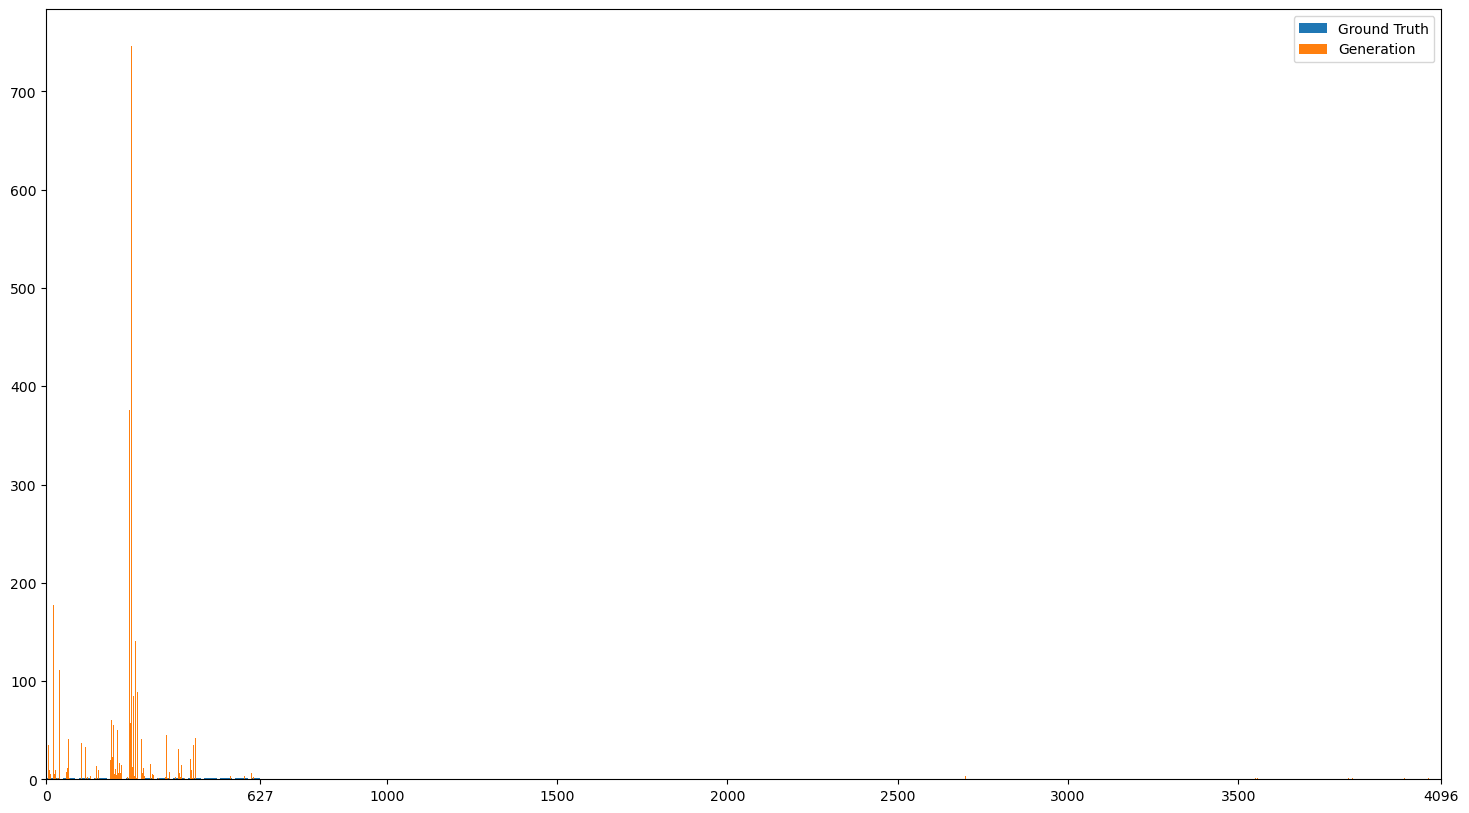

In [113]:
# visualization
x_lim = reordered_set.shape[1]
n_ticks = 8
xtick = np.arange(0,x_lim,int(x_lim/n_ticks/100+0.5)*100)
xtick[np.argmin(np.abs(xtick - values_d.size))] = values_d.size
xtick[-1] = x_lim

fig, ax = plt.subplots(figsize=(18, 10))
ax.bar(values_d,counts_d,label = "Ground Truth")
ax.bar(values_t,counts_t,label = "Generation")
ax.set(xlim=(0, x_lim), xticks=xtick)
plt.legend()

In [114]:
statistics

{'percent': 0.9981,
 'FN': array([  0,   1,   2,   3,   5,  15,  16,  18,  26,  28,  30,  31,  32,
         34,  35,  36,  37,  38,  41,  48,  50,  52,  53,  56,  57,  64,
         66,  69,  70,  71,  72,  73,  74,  75,  77,  80,  81,  83,  84,
         85,  89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 104, 106, 107, 109, 110, 112, 116, 117, 118, 120, 122, 123,
        124, 125, 127, 131, 133, 135, 137, 141, 142, 150, 152, 154, 156,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184,
        216, 220, 226, 228, 232, 233, 235, 237, 240, 241, 261, 269, 286,
        290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
        303, 304, 305, 309, 311, 316, 317, 318, 320, 321, 322, 324, 326,
        328, 330, 332, 333, 334, 335, 336, 338, 339, 341, 342, 343, 344,
        345, 346, 347, 348, 357, 359, 361, 365, 367, 369, 373, 374, 375,
        376, 377, 378, 38

In [115]:
MSE

15.81643507

percent: (original) 0.8146,0.8227, 0.8231; (salience) 0.9485 (after 45 epochs, datasize=4000), (+10 epochs)0.9534, 0.9648,0.9698, 0.9687,0.9727, 0.9728; (generated dataset) 0.9887,0.989,0.993,0.9981

n_fn: 34,29,37; 72,80,83,81,86,80,88; 140,153,186,359

n_fp: 1138,1122,1089; 410,371,301,251,275,231,237; 98,93,58,16

MSE: 0.3040,0.2839,0.2824; 0.2824,9.1827,12.72,19.74,17.59,18.48,27.11; 230.67,527.85,502.87,15.81